In [1]:
import numpy as np
import matplotlib.pyplot as plt

In this exercise, we will build a "synthetic" image with an iceberg. In this way, we can use an "un-optimized" algorithm that works in very easy scenarios.


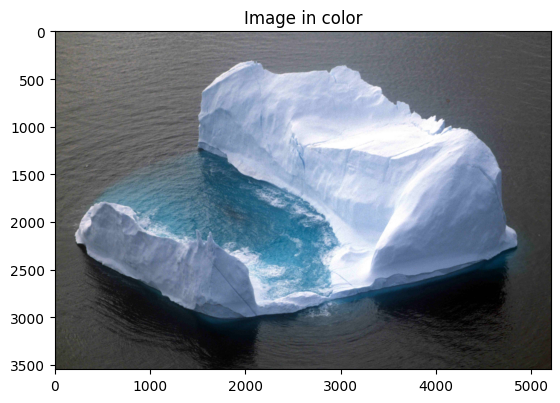

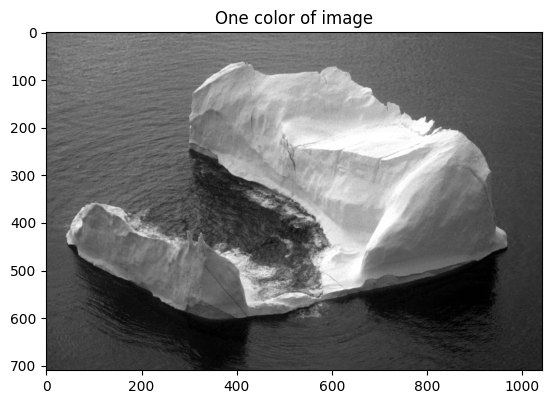

In [2]:
# We start by reading one .jpg image
# Write here the path where the data are
path = './'
filename = 'Iceberg_1_1997_08_07.jpg'

pictureRGB = plt.imread(path + filename)
s = pictureRGB.shape
dy, dx = s[0], s[1]

plt.figure()
plt.imshow(pictureRGB)
plt.title('Image in color')

# The information regarding shift is the same in all the colors, but clearly one color may allow a better estimation than another.
# You can test the different colors and see if there is one that works best.
color = 0
picture = pictureRGB[::5, ::5, color]
s = picture.shape
py, px = s[0], s[1]

plt.figure()
plt.imshow(picture, cmap='gray')
plt.title('One color of image')
picture = picture.astype(float) / 255.0  # Normalized, double precision images


Now we want to simulate two larger images where the iceberg moves around. In this simulation, the background noise represents the intensity of the sea. In jargon, the background is called clutter. You can try to change the amount of noise and you will see when the algorithm starts to fail. It is quite amusing me that you have to add a lot of noise before it stop working :)

Text(0.5, 1.0, 'Image with picture in the middle')

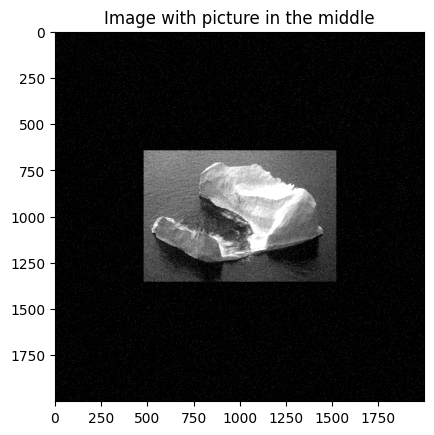

In [3]:
dimx, dimy = 2000, 2000  # Dimensions of the larger image
image1 = np.zeros((dimx, dimy))  # The mold (or stamp) for the large image
SNR = 30 * np.mean(np.mean(picture**2))  # Noise that we add to the background


# In the next lines, we insert the small iceberg image inside the larger background. There are three different ways to combine image and noise

# Case 1: noise in background and image
image1[int(dimy/2 - py/2):int(dimy/2 + py/2),int(dimx/2 - px/2):int(dimx/2 + px/2)] = picture
noise1 = np.random.randn(dimx, dimy) / SNR
image1 = image1 + noise1

# Case 2: Noise only on background
# noise1 = np.random.randn(dimx, dimy) / SNR
# image1 = image1 + noise1
# image1[int(dimy/2 - py/2):int(dimy/2 + py/2),int(dimx/2 - px/2):int(dimx/2 + px/2)] = picture

# Case 3: Multiplicative noise
# image1[int(dimy/2 - py/2):int(dimy/2 + py/2),int(dimx/2 - px/2):int(dimx/2 + px/2)] = picture
# noise1 = np.random.randn(dimx, dimy) / SNR
# image1 = image1 + noise1
# speck = np.abs(np.random.randn(dimx, dimy))**2
# image1 = speck * image1

plt.figure()
plt.imshow(image1, cmap='gray', vmin=0, vmax=12 * np.mean(np.mean(image1)))
plt.title('Image with picture in the middle')



Now we let the iceberg move around and then we take another image after 
Try case 1, 2, and 3. Compare the estimated shifts with the true shifts for each case, what do you find?

Text(0.5, 1.0, 'Image with moved iceberg')

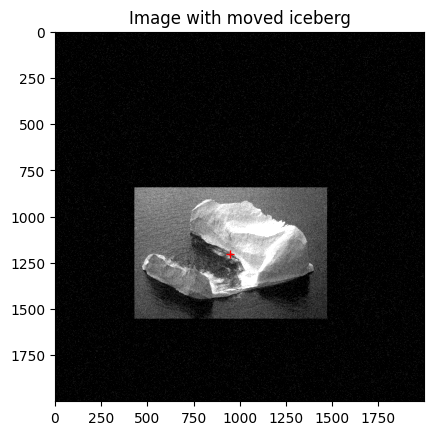

In [4]:
image2 = np.zeros((dimx, dimy))

# We simulate that the movement of the iceberg by inputting the shift in the coordinates
# input the shift in x and y. Try different values, make sure the iceberg is inside the image
shift_x_ture = -50 
shift_y_ture = 200 

# shifted coordinates
jumpx=dimx/2+shift_x_ture
jumpy=dimy/2+shift_y_ture

# As for the previous situation, we can simulate select the same noise (case number) as img 1
# Case 1: noise on background and image
image2[int(jumpy - py // 2):int(jumpy + py // 2),int(jumpx - px // 2):int(jumpx + px // 2)] = picture
noise2 = np.random.randn(dimx, dimy) / SNR
image2 = image2 + noise2

# Case 2: noise on background only
# noise2 = np.random.randn(dimx, dimy) / SNR
# image2 = image2 + noise2
# image2[int(jumpy - py // 2):int(jumpy + py // 2),int(jumpx - px // 2):int(jumpx + px // 2)] = picture

# Case 3: Multiplicative noise
# image2[int(jumpy - py // 2):int(jumpy + py // 2),int(jumpx - px // 2):int(jumpx + px // 2)] = picture
# noise2 = np.random.randn(dimx, dimy) / SNR
# image2 = image2 + noise2
# speck = np.abs(np.random.randn(dimx, dimy))**2
# image2 = speck * image2

plt.figure()
plt.imshow(image2, cmap='gray', vmin=0, vmax=12 * np.mean(np.mean(image2)))
plt.plot(jumpx, jumpy, 'r+')
plt.title('Image with moved iceberg')



Now we have to discover how many pixels the iceberg moved. The best is to perform a correlation in the frequency domain.


The maximum is located at [1050] [800]


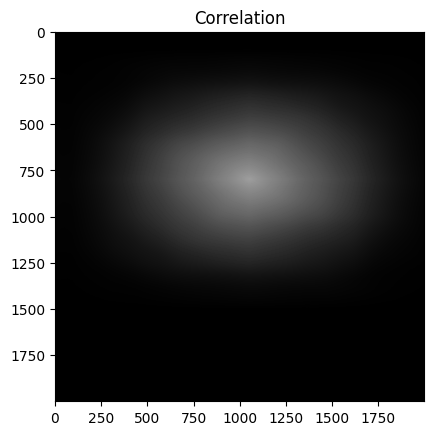

In [5]:
# First, we calculate the Fast Fourier Transforms of the two (intensity) images
I1 = np.fft.fft2(image1)
I2 = np.fft.fft2(image2)

# If you are curious to see how the spectral component of the images look like,
# you can plot the magnitude of the transformed images.
# The FFT returns the zero frequency in the origin of the image (upper-left corner).
# But this way of visualizing is a bit misleading, since the transform is periodic,
# and we are used to visualizing the zero of periodic function in the middle of the image.
# For this reason, in the visualization, we can circularly shift the spectrum
# (i.e., what goes out to the right, comes back in from the left of the image).
# plt.figure()
# plt.imshow(np.fft.fftshift(np.abs(I1)), cmap='gray', vmin=0, vmax=3 * np.mean(np.mean(np.abs(I1))))
# plt.title('Spectrum of first image: shifted')

# plt.figure()
# plt.imshow(np.fft.fftshift(np.abs(I2)), cmap='gray', vmin=0, vmax=3 * np.mean(np.mean(np.abs(I2))))
# plt.title('Spectrum of second image: shifted')

# The correlation can be evaluated with the product of the spectra. In the following, we prefer to normalize it
# by the total energy of the image. This is because we get a number between 0 and 1
# where 1 means that the two images are identical (but shifted) and 0 means that they have nothing in common.
Prod = I1 * np.conj(I2) / np.sqrt(np.mean(np.mean(np.abs(I1)**2)) * np.mean(np.mean(np.abs(I2)**2)))
Corr = np.abs(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(Prod))))

plt.figure()
plt.imshow(np.abs(Corr), cmap='gray', vmin=0, vmax=1)
plt.title('Correlation')

# We want to find the maximum to retrieve the shift.
# First, we extract the maximum value.
maxValue = np.max(np.abs(Corr))

# Then we find where the maximum is located.
yMax, xMax = np.where(np.abs(Corr) == maxValue)
print('The maximum is located at', xMax, yMax)


In [6]:
# estimte Shifts and compare with the true shifts
shift_y = Corr.shape[0] / 2 - yMax
shift_x = Corr.shape[1] / 2 - xMax
print('The real shift is: ', shift_x_ture, shift_y_ture)
print('The estimated shift is: ', shift_x, shift_y)

The real shift is:  -50 200
The estimated shift is:  [-50.] [200.]


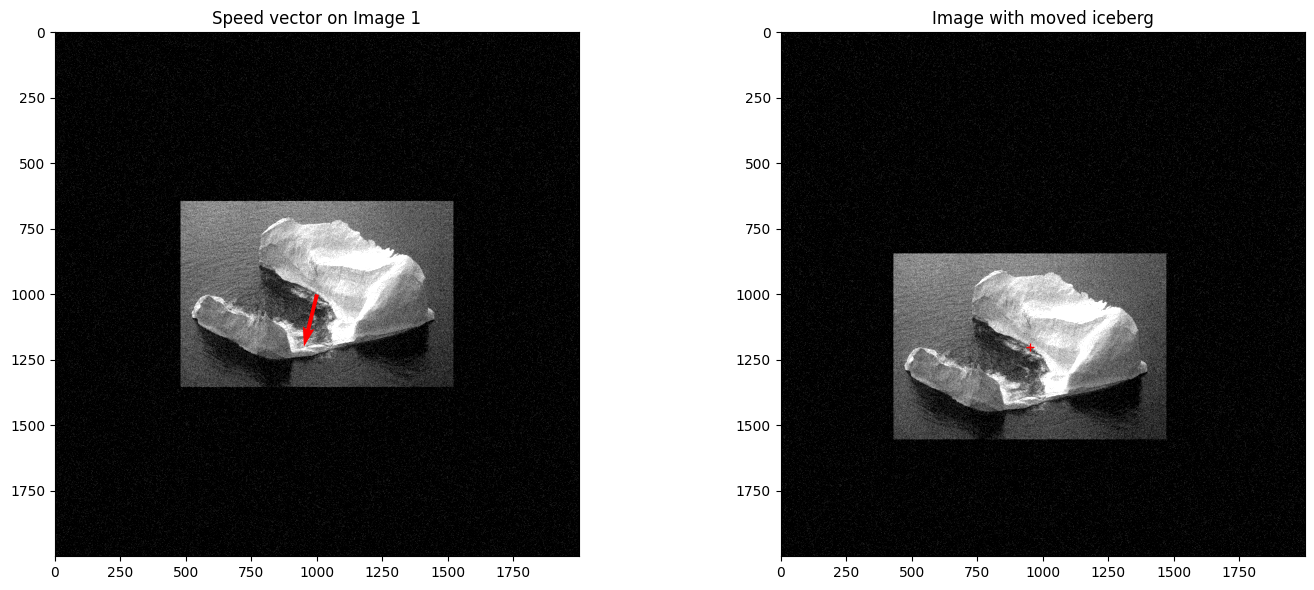

In [7]:
# visualize the shift
# Create a figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Visualize the shift on Image 1
ax1.imshow(image1, cmap='gray', vmin=0, vmax=12 * np.mean(image1))
ax1.set_title('Speed vector on Image 1')

# Draw the result on subplot 1
startpoint = np.array([dimx/2, dimy/2])
ax1.quiver(startpoint[1], startpoint[0], 
           shift_x, shift_y, 
           angles='xy', scale_units='xy', 
           scale=1, 
           color='red')

# Subplot 2: Image with moved iceberg (Image 2)
ax2.imshow(image2, cmap='gray', vmin=0, vmax=12 * np.mean(np.mean(image2)))
ax2.plot(jumpx, jumpy, 'r+')
ax2.set_title('Image with moved iceberg')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()